# MIDS W261: Machine Learning at Scale 

   - **Author**: Karthik Chepudira, Konniam Chan

   - **Email**: kchepudira@berkeley.edu, konniam.chan@berkeley.edu
   
   - **Class**: W261-3 Spring 2016
   
   - **Week**: 3
   
   - **Submission Date**: 02-04-2016

### HW3.0.
**What is a merge sort? 
Where is it used in Hadoop?
How is  a combiner function in the context of Hadoop? 
Give an example where it can be used and justify why it should be used in the context of this problem.
What is the Hadoop shuffle?**

### Solution 

**Merge sort** is an algorithm that belongs to family of Merge algorithms that takes an approach of divide and conquer by splitting up a list of n unsorted elements into n sublists with 1 element each and further repeatedly merges sublists while sorting them until only 1 sorted sublist remains.  

Conceptually, a merge sort works as follows:

    1. Divide the unsorted list into n sublists, each containing 1 element (a list of 1 element is considered sorted).
    2. Repeatedly merge sublists to produce new sorted sublists until there is only 1 sublist remaining. This will be the sorted list.

merge sort has a time complexity of $O(n\log{}n)$
 
**Merge sort in Hadoop** could be used in situation where individual sorted lists need to be merged and sorted. This is used in
hadoop to merge partition files stream to reducer. 

merge sort of sorted lists has a time complexity of $O(n)$

**Combiners** are an optimization in MapReduce that allows for aggregation before the shuffe phase.
In a word count problem in MapReduce combiners and be used for aggregation to reduce the number of tuples transferred across the network from mappers to reducers.

     Input: 
      It is a sunny day
      It is a rainy day

     Mapper output :
      [ (It,1) (is,1) (a,1) (sunny,1) (day,1) (It,1) (is,1) (a,1) (rainy,1) (day,1) ]

     Combiner Output:
      [ (It,2) (is,2) (a,2) (sunny,1) (day,2) (rainy,1) ]
 
 
 **Hadoop shuffle**  refers to processes that happen between the mapper producing the output and the reducer consuming it. When the map function starts producing output it's not simply written to disk. The shuffle  patitions, sorts, and combines mapper outputs before sending them to the reducers, taking advantage of buffering write in memory and doing some presorting for efficiency reasons. In the end, the reducer receives a merged partition file sorted by key.  


**References:**     
1. [Wikipedia Merge Sort](https://en.wikipedia.org/wiki/Merge_sort).
2. [Merge sort in detail](http://www.personal.kent.edu/~rmuhamma/Algorithms/MyAlgorithms/Sorting/mergeSort.htm).



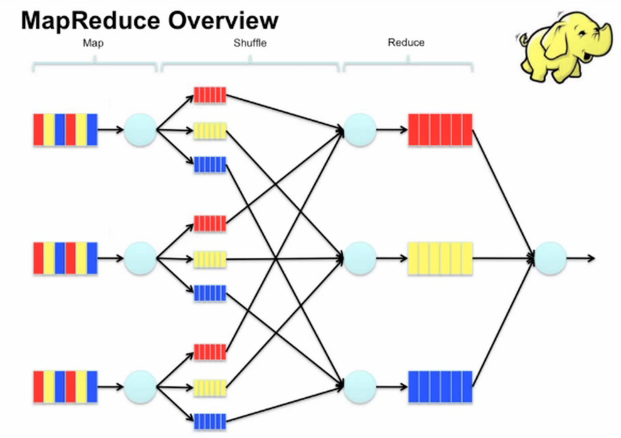

In [1]:
from IPython.display import Image
Image(filename='HadoopShuffle.png')

### HW3.1

Use Counters to do EDA (exploratory data analysis and to monitor progress)
Counters are lightweight objects in Hadoop that allow you to keep track of system progress in both the map and reduce stages of processing. By default, Hadoop defines a number of standard counters in "groups"; these show up in the jobtracker webapp, giving you information such as "Map input records", "Map output records", etc.  
  
While processing information/data using MapReduce job, it is a challenge to monitor the progress of parallel threads running across nodes of distributed clusters. Moreover, it is also complicated to distinguish between the data that has been processed and the data which is yet to be processed. The MapReduce Framework offers a provision of user-defined Counters, which can be effectively utilized to monitor the progress of data across nodes of distributed clusters.  
  
Use the Consumer Complaints  Dataset provide here to complete this question:  
  
     https://www.dropbox.com/s/vbalm3yva2rr86m/Consumer_Complaints.csv?dl=0  
  
The consumer complaints dataset consists of diverse consumer complaints, which have been reported across the United States regarding various types of loans. The dataset consists of records of the form:  
  
Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?  

Here’s is the first few lines of the  of the Consumer Complaints  Dataset:  

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?  
1114245,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify   debt,FL,32219,Web,11/13/2014,11/13/2014,"Choice Recovery, Inc.",Closed with explanation,Yes,  
1114488,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,TX,75006,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,  
1114255,Bank account or service,Checking account,Deposits and withdrawals,,NY,11102,Web,11/13/2014,11/13/2014,"FNIS (Fidelity National Information Services, Inc.)",In progress,Yes,  
1115106,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,GA,31721,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,  
  
User-defined Counters  
  
Now, let’s use Hadoop Counters to identify the number of complaints pertaining to debt collection, mortgage and other categories (all other categories get lumped into this one) in the consumer complaints dataset. Basically produce the distribution of the Product column in this dataset using counters (limited to 3 counters here).  
  
Hadoop offers Job Tracker, an UI tool to determine the status and statistics of all jobs. Using the job tracker UI, developers can view the Counters that have been created. Screenshot your  job tracker UI as your job completes and include it here. Make sure that your user defined counters are visible.   

In [1]:
# Start hadoop
!start-dfs.sh
!start-yarn.sh

16/01/29 11:22:41 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /Users/InfernoIX/hadoop-2.7.1/logs/hadoop-InfernoIX-namenode-Konniams-MacBook-Air.local.out
localhost: starting datanode, logging to /Users/InfernoIX/hadoop-2.7.1/logs/hadoop-InfernoIX-datanode-Konniams-MacBook-Air.local.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /Users/InfernoIX/hadoop-2.7.1/logs/hadoop-InfernoIX-secondarynamenode-Konniams-MacBook-Air.local.out
16/01/29 11:23:03 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
starting yarn daemons
starting resourcemanager, logging to /Users/InfernoIX/hadoop-2.7.1/logs/yarn-InfernoIX-resourcemanager-Konniams-MacBook-Air.local.out
localhost: starting nodemanager, logging to /Users/InfernoIX

In [2]:
# Remove header of the CSV file to simplify later steps
# !tail -n +2 Consumer_Complaints.csv > Consumer_Fixed.csv
# !mv Consumer_Fixed.csv Consumer_Complaints.csv

In [7]:
# Place in HDFS
!hdfs dfs -put Consumer_Complaints.csv /user/konniam/week_03

16/01/29 12:04:06 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
%%writefile mapper.py
#!/usr/bin/env python
# Use mapper to do EDA using counters
import sys

for line in sys.stdin:
    complaint = line.strip().split(',')
    # Second column contains the product info
    if complaint[1] == "Debt collection":
        sys.stderr.write("reporter:counter:Debt-Counter,debt,1\n")
    elif complaint[1] == "Mortgage":
        sys.stderr.write("reporter:counter:Mortgage-Counter,mortgage,1\n")
    else:
        sys.stderr.write("reporter:counter:Other-Counter,other,1\n")
    # Output original line
    print line

Writing mapper.py


In [4]:
!chmod a+x mapper.py

In [39]:
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_1_output

16/01/29 15:03:36 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/29 15:03:39 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_1_output


In [5]:
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_1_output
# Run MR job to increment counters, with Identity Reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-mapper $PWD/mapper.py \
-reducer /bin/cat \
-input /user/konniam/week_03/Consumer_Complaints.csv \
-output /user/konniam/week_03/hw_3_1_output

16/01/31 16:37:59 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/31 16:38:00 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_1_output
16/01/31 16:38:02 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar5873106299045917131/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob1911821617765572003.jar tmpDir=null
16/01/31 16:38:03 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/01/31 16:38:04 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/01/31 16:38:05 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/31 16:38:05 INFO mapreduce.JobSubmitter: number of splits:2
16/01/31 

In [7]:
from IPython.display import Image

### 3.1 Response
Counters shown below:

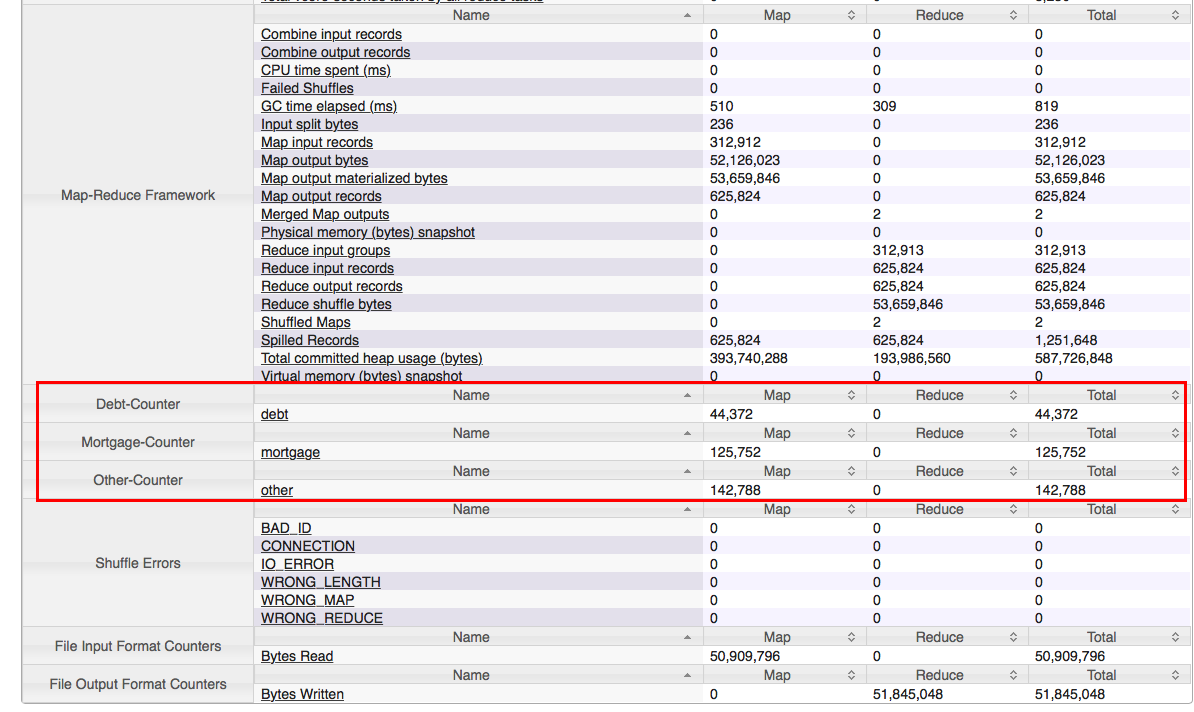

In [9]:
Image(filename='hw_3_1_counter.png')

### HW 3.2 Analyze the performance of your Mappers, Combiners and Reducers using Counters

#### 3.2 Part 1
For this brief study the Input file will be one record (the next line only): 
foo foo quux labs foo bar quux  
  
Perform a word count analysis of this single record dataset using a Mapper and Reducer based WordCount (i.e., no combiners are used here) using user defined Counters to count up how many time the mapper and reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing this word count job. The answer  should be 1 and 4 respectively. Please explain. 

In [4]:
!echo "foo foo quux labs foo bar quux" > input3.2.txt
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_2.txt
!hdfs dfs -put input3.2.txt /user/konniam/week_03/hw_3_2.txt
!hdfs dfs -cat /user/konniam/week_03/hw_3_2.txt

16/02/01 03:13:17 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 360 minutes, Emptier interval = 0 minutes.
Moved: 'hdfs://sandbox.hortonworks.com:8020/tmp/3.2/input3.2.txt' to trash at: hdfs://sandbox.hortonworks.com:8020/user/root/.Trash/Current
foo foo quux labs foo bar quux


#### Mapper

In [1]:
%%writefile mapper3.2.py
#!/usr/bin/env python
## reducer3.2.py
## Author: karthik chepudira
## Description: mapper code for HW3.2
import sys

sys.stderr.write("reporter:counter:MRCounter,Mapper,1\n") #increment the counter for Mapper
for line in sys.stdin:
    if not line in ['\n', '\r\n']: # check for empty lines and ignore
        words = line.rstrip().split()
        for word in words:
            print word+'\t'+str(1)
    

Overwriting mapper3.2.py


#### Reducer

In [2]:
%%writefile reducer3.2.py
#!/usr/bin/env python
## reducer3.2.py
## Author: karthik chepudira
## Description: reducer code for HW3.2

import sys
sys.stderr.write("reporter:counter:MRCounter,Reducer,1\n") # increment the counter for Reducer

#funtion to print reducer output by key
def wcount(prev_word ,counts):
    if prev_word != "-1": # check if a valid key
        print(prev_word+ "\t"+str(counts)) # Print reducer output
        
prev_word = "-1"
counts = 0
linecount=0 #Keep track of total lines of input processed by reducer
for line in sys.stdin:
    line = line.rstrip()
    linecount+=1
    word, value =line.split("\t",1)
    if word!=prev_word: #if all rows of a key are processed
        wcount(prev_word, counts) # call the print function
        prev_word = word # reset key
        counts = 0 #reset key count
    counts += eval(value)
if linecount >0: # if reducer processed atleast 1 line
    if word==prev_word:
        wcount(prev_word, counts)


Overwriting reducer3.2.py


In [3]:
!chmod a+x mapper3.2.py reducer3.2.py

In [6]:
!hdfs dfs -rm -r /tmp/3.2/streamout
# Run word count to increment mapper and reducer counters
!hadoop jar /usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar \
-D mapred.job.name="HW3.2" \
-D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.map.tasks=1 \
-D mapred.reduce.tasks=4 \
-input /tmp/3.2/input3.2.txt \
-output /tmp/3.2/streamout \
-mapper '/usr/bin/python2.6 /usr/tmp/ds261/HW3/mapper3.2.py' \
-reducer '/usr/bin/python2.6 /usr/tmp/ds261/HW3/reducer3.2.py' \

16/02/02 04:07:25 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 360 minutes, Emptier interval = 0 minutes.
Moved: 'hdfs://sandbox.hortonworks.com:8020/tmp/3.2/streamout' to trash at: hdfs://sandbox.hortonworks.com:8020/user/root/.Trash/Current
packageJobJar: [] [/usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar] /tmp/streamjob9161353458867003514.jar tmpDir=null
16/02/02 04:07:33 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/02 04:07:33 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/02 04:07:35 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/02 04:07:35 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/02 04:07:36 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/02 

#### 3.2 Part 1 Response

1. Invoke the hadoop job specifying the number of Map tasks and reduce tasks by using the following options
    - -D mapred.map.tasks=1 \
    - -D mapred.reduce.tasks=4 \
    
    


### 3.2 Part 2
Please use mulitple mappers and reducers for these jobs (at least 2 mappers and 2 reducers).  
Perform a word count analysis of the Issue column of the Consumer Complaints  Dataset using a Mapper and Reducer based WordCount (i.e., no combiners used anywhere)  using user defined Counters to count up how many time the mapper and reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing your word count job.

#### Mapper 3.2 Part 2

In [7]:
%%writefile mapper3.2_2.py
#!/usr/bin/env python
## reducer3.2_2.py
## Author: karthik chepudira
## Description: mapper code for HW3.2 part 2
import sys
import re
from nltk.corpus import stopwords #stopwords from nltk
from csv import reader #csv reader

sys.stderr.write("reporter:counter:MRCounter,Mapper,1\n") #increment the counter for Mapper

# function to remove puntucation from string
def removepunctuation(inputstring):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    ret_string = ""
    for char in inputstring:
        if char not in punctuations:
            ret_string = ret_string + char
    return ret_string

total_count =0
linecount=0 #Keep track of total lines of input processed by mapper
for line in reader(sys.stdin): # use csvreader to process input line.
    if not line in ['\n', '\r\n']:
        linecount+=1
        columns = line
        colissue=columns[3] #third column of csv file has the 'issue' field
        #remove punctuation , lower , split and check alphanumeric.
        words = [w for w in removepunctuation(colissue).lower().split() if not w in stopwords.words('english') and  w.isalpha()]
        for word in words:
            print word+'\t'+str(1)
            total_count+=1
if linecount >0: # if mapper processed atleast 1 line
    print "*"+"\t"+str(total_count)
    

Overwriting mapper3.2_2.py


#### Reducer 3.2 Part 2

In [8]:
%%writefile reducer3.2_2.py
#!/usr/bin/env python
## reducer3.2_2.py
## Author: karthik chepudira
## Description: reducer code for HW3.2 part 2
import sys
prev_key="-1"
count=0
total_count=0 #keep count of the keys processed
for line in sys.stdin:
    key,value=line.split("\t",1)
    if key == "*":
        total_count+= eval(value) #increment the total key count from the mapper output.
    else:
        if prev_key != key:
            if prev_key !="-1":
                print prev_key+"\t"+str(count) #print key,value pair
                count = 0 #reset count
            prev_key = key # reset key
            count+=eval(value) #increment count
        else:
            count+=eval(value) # increment count
print prev_key+"\t"+str(count) # print the lasy key
print "*"+"\t"+str(total_count) #print the total key count.
sys.stderr.write("reporter:counter:MRCounter,Reducer,1\n") # increment the counter for Reducer

Overwriting reducer3.2_2.py


In [9]:
!chmod a+x mapper3.2_2.py reducer3.2_2.py

In [2]:
#remove directory
!hdfs dfs -rm -r /tmp/3.2/streamout2
#run hadoop job
!hadoop jar /usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar \
-D mapred.job.name="HW3.2_2" \
-D mapred.map.tasks=2 \
-D mapred.reduce.tasks=2 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.text.key.comparator.options="-k1" \
-input /tmp/3.1/Consumer_Complaints.csv \
-output /tmp/3.2/streamout2 \
-mapper '/usr/bin/python2.6 /usr/tmp/ds261/HW3/mapper3.2_2.py' \
-reducer '/usr/bin/python2.6 /usr/tmp/ds261/HW3/reducer3.2_2.py' 

rm: `/tmp/3.2/streamout2': No such file or directory
packageJobJar: [] [/usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar] /tmp/streamjob8758615865896012356.jar tmpDir=null
16/02/02 20:58:21 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/02 20:58:21 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.177.132:8050
16/02/02 20:58:22 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/02 20:58:22 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.177.132:8050
16/02/02 20:58:23 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/02 20:58:23 INFO mapreduce.JobSubmitter: number of splits:2
16/02/02 20:58:24 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1454426531297_0003
16/02/02 20:58:24 INFO impl.YarnClientImpl: Submitted application app

In [8]:
!hdfs dfs -cat /tmp/3.2/streamout2/part* | sort -k2,2rn > output_3.2_2.txt
!cat output_3.2_2.txt

*	1002219
loan	119491
modificationcollectionforeclosure	70487
account	57448
credit	50897
payments	39993
escrow	36767
servicing	36767
report	30546
incorrect	29069
information	29069
debt	27876
attempts	17972
collect	17972
contd	17972
owed	17972
closing	16205
management	16205
opening	16205
deposits	10555
withdrawals	10555
problems	9484
application	8868
communication	8671
tactics	8671
broker	8625
mortgage	8625
originator	8625
unable	8178
billing	8158
disclosure	7655
verification	7655
disputes	6938
reporting	6560
lease	6337
caused	5663
funds	5663
low	5663
process	5505
managing	5006
improper	4966
companys	4858
investigation	4858
identity	4729
card	4407
get	4357
reportcredit	4357
score	4357
costs	4350
settlement	4350
interest	4238
protection	4143
repaying	3844
fraud	3842
pay	3821
contact	3710
money	3639
false	3621
representation	3621
statements	3621
info	3553
sharing	3489
apr	3431
rate	3431
embezzlement	3276
theft	3276
makingreceiving	3226
sending	3226
fee	3198
action	2964
illegal	2964
taking

In [1]:
%%writefile wordcountanalysis.py
#!/usr/bin/env python
## wordcountanalysis.py
## Author: karthik chepudira
## Description: HW3.2 part 2
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np
import sys

plt.switch_backend('agg')

def plotmodel(filename,plotname):
    df = pd.read_csv(filename,sep='\t',header=0)
    df.columns =['Word','Count']
    df['Count'] = df['Count'].astype('int')
    fig, ax = plt.subplots()
    fig.suptitle('Histogram for Wordcount')    
    df.head(10).plot(x='Word', y='Count',ax = ax, kind='bar')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Top 10 Words')
    fontP = FontProperties()
    fontP.set_size('small')    
    fig.savefig(plotname+".jpg",bbox_inches='tight')
    
if len(sys.argv) > 2:
    plotname = str(sys.argv[2])
    filename = str(sys.argv[1])
    plotmodel(filename,plotname)
else:
    print "Incorrect number of parameters: please provide model filename "
    exit()

Overwriting wordcountanalysis.py


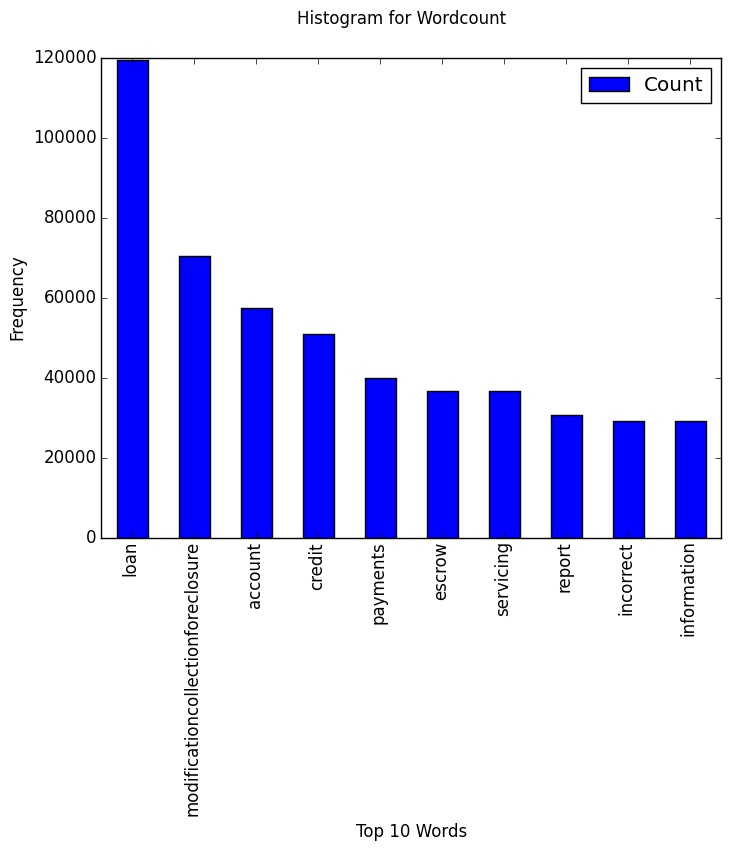

In [2]:
!chmod a+x wordcountanalysis.py
! ./wordcountanalysis.py "output_3.2_2.txt" 'HW3.2'
from IPython.display import Image
Image(filename='HW3.2.jpg')

#### 3.2 Part 2 Response

 The value of the user defined Mapper Counter is: 2
 
 The value of the user defined Reducer Counter is: 2
 
       MRCounter
		Mapper=2
		Reducer=2          

#### 3.2 Part 3
Perform a word count analysis of the Issue column of the Consumer Complaints  Dataset using a Mapper, Reducer, and standalone combiner (i.e., not an in-memory combiner) based WordCount using user defined Counters to count up how many time the mapper, combiner, reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing your word count job.  

### Combiner 3.2_3.py

In [10]:
%%writefile combiner3.2_3.py
#!/usr/bin/env python
## combiner3.2_3.py
## Author: karthik chepudira
## Description: combiner code for HW3.2 Part 3
import sys
prev_key=-1
count=0
total_count =0 #keep count of the keys processed
for line in sys.stdin:
    key,value=line.split("\t",1)
    if key == "*":
        total_count+= eval(value)  #increment the total key count from the mapper output.
    else:
        if prev_key != key:
            if prev_key !=-1:
                print prev_key+"\t"+str(count) #print key,value pair
                count = 0 #reset count
            prev_key = key # reset key
            count+=eval(value)
        else:
            count+=eval(value) # increment count
print prev_key+"\t"+str(count) # print the lasy key
print "*"+"\t"+str(total_count) #print the total key count.
sys.stderr.write("reporter:counter:MRCounter,Combiner,1\n") # increment the counter for Combiner

Overwriting combiner3.2_3.py


In [11]:
!chmod a+x combiner3.2_3.py

In [12]:
#remove directory
!hdfs dfs -rm -r /tmp/3.2/streamout3
#run hadoop job
!hadoop jar /usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar \
-D mapred.job.name="HW3.2_2" \
-D mapred.map.tasks=2 \
-D mapred.reduce.tasks=2 \
-input /tmp/3.1/Consumer_Complaints.csv \
-output /tmp/3.2/streamout3 \
-mapper '/usr/bin/python2.6 /usr/tmp/ds261/HW3/mapper3.2_2.py' \
-reducer '/usr/bin/python2.6 /usr/tmp/ds261/HW3/reducer3.2_2.py' \
-combiner '/usr/bin/python2.6 /usr/tmp/ds261/HW3/combiner3.2_3.py' 

16/02/01 03:48:35 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 360 minutes, Emptier interval = 0 minutes.
Moved: 'hdfs://sandbox.hortonworks.com:8020/tmp/3.2/streamout3' to trash at: hdfs://sandbox.hortonworks.com:8020/user/root/.Trash/Current
packageJobJar: [] [/usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar] /tmp/streamjob4395809441324277872.jar tmpDir=null
16/02/01 03:48:41 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 03:48:42 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/01 03:48:43 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 03:48:43 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/01 03:48:44 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/01

#### 3.2 Part 3 Response

 The value of the user defined Mapper Counter is: 2
 
 The value of the user defined Combiner Counter is: 4
 
 The value of the user defined Reducer Counter is: 2
 
	MRCounter
		Combiner=4
		Mapper=2
		Reducer=2 

#### 3.2 Part 4
Using a single reducer: What are the top 50 most frequent terms in your word count analysis? Present the top 50 terms and their frequency and their relative frequency. Present the top 50 terms and their frequency and their relative frequency. If there are ties please sort the tokens in alphanumeric/string order. Present bottom 10 tokens (least frequent items). 

### mapper 3.2_4

In [13]:
%%writefile mapper3.2_4.py
#!/usr/bin/env python
## mapper3.2_4.py
## Author: karthik chepudira
## Description: mapper code for HW3.2 part 4
import sys
import re

for line in sys.stdin:
    if not line in ['\n', '\r\n']: #check for blank lines
        print line.rstrip() #print line

sys.stderr.write("reporter:counter:MRCounter,Mapper,1\n") # increment the counter for Mapper

Overwriting mapper3.2_4.py


### Reducer 3.2_4

In [7]:
%%writefile reducer3.2_4.py
#!/usr/bin/env python
## reducer3.2_4.py
## Author: karthik chepudira
## Description: reducer code for HW3.2 part 4
import sys
import Queue

n_max, n_min = 50, 10 #number of most and least frequent items
q_min = Queue.Queue(n_min) # implement a queue for least frequent items
a_max = [] # list of most frequent items
total_count=0

for line in sys.stdin:
    word,count=line.rstrip().split("\t",1)
    if word == "*":
        total_count += eval(count) # Total number of records
    else:
        # put the biggest
        if len(a_max) < n_max:
            a_max.append(word+","+count) #append the most frequent items to the list
        if q_min.full():
            q_min.get()
        q_min.put(word+","+count) #insert next least frequnet item to queue
    
print '\n%d Most Frequent  records:' %n_max
for record in a_max:
    word,count=record.split(",",1)
    print record+","+str((1.0*eval(count))/(total_count)) # calculate relative frequency and print record

print '\n%d Least Frequent records:' %n_min
for i in range(n_min):
    word,count=q_min.get().split(",",1)
    print word+","+count+","+str((1.0*eval(count))/(total_count)) # calculate relative frequency and print record
    
sys.stderr.write("reporter:counter:MRCounter,Reducer,1\n") #increment the Reducer Counter

Overwriting reducer3.2_4.py


In [8]:
!chmod a+x mapper3.2_4.py reducer3.2_4.py

### MapReduce Job 1 to calculate frequency for all items and Total Count

In [21]:
## remove directory
!hdfs dfs -rm -r /tmp/3.2/streamout4
#run hadoop job
!hadoop jar /usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar \
-D mapred.job.name="HW3.2_4" \
-D mapred.map.tasks=2 \
-D mapred.reduce.tasks=1 \
-D stream.num.map.output.key.fields=2 \
-D mapreduce.partition.keypartitioner.options=-k1,1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.text.key.comparator.options="-k1 -k2nr" \
-input /tmp/3.1/Consumer_Complaints.csv \
-output /tmp/3.2/streamout4 \
-mapper '/usr/bin/python2.6 /usr/tmp/ds261/HW3/mapper3.2_2.py' \
-reducer '/usr/bin/python2.6 /usr/tmp/ds261/HW3/reducer3.2_2.py' \
-partitioner org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner \
-combiner '/usr/bin/python2.6 /usr/tmp/ds261/HW3/combiner3.2_3.py'

16/02/01 04:32:50 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 360 minutes, Emptier interval = 0 minutes.
Moved: 'hdfs://sandbox.hortonworks.com:8020/tmp/3.2/streamout4' to trash at: hdfs://sandbox.hortonworks.com:8020/user/root/.Trash/Current
packageJobJar: [] [/usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar] /tmp/streamjob85037138404013378.jar tmpDir=null
16/02/01 04:32:56 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 04:32:56 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/01 04:32:57 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 04:32:57 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/01 04:32:58 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/01 0

### MapReduce Job 2 to sort and filter for Most Frequent and Least Frequent Items

In [22]:
## remove directory
!hdfs dfs -rm -r /tmp/3.2/streamout4_2
#run hadoop job
!hadoop jar /usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar \
-D mapred.job.name="HW3.2_4" \
-D mapred.map.tasks=2 \
-D mapred.reduce.tasks=1 \
-D stream.num.map.output.key.fields=2 \
-D mapreduce.partition.keypartitioner.options=-k1,1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.text.key.comparator.options="-k2nr -k1" \
-input /tmp/3.2/streamout4/* \
-output /tmp/3.2/streamout4_2 \
-mapper '/usr/bin/python2.6 /usr/tmp/ds261/HW3/mapper3.2_4.py' \
-reducer '/usr/bin/python2.6 /usr/tmp/ds261/HW3/reducer3.2_4.py' \
-partitioner org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner 
#-combiner '/usr/bin/python2.6 /usr/tmp/ds261/HW3/combiner3.2_3.py'

16/02/01 04:37:26 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 360 minutes, Emptier interval = 0 minutes.
Moved: 'hdfs://sandbox.hortonworks.com:8020/tmp/3.2/streamout4_2' to trash at: hdfs://sandbox.hortonworks.com:8020/user/root/.Trash/Current
packageJobJar: [] [/usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar] /tmp/streamjob8371278169569604881.jar tmpDir=null
16/02/01 04:37:31 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 04:37:32 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/01 04:37:32 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 04:37:32 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.214.133:8050
16/02/01 04:37:33 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/

In [23]:
!hdfs dfs -cat /tmp/3.2/streamout4_2/part-00000

	
50 Most Frequent  records:	
loan,119491,0.119226436537	
modificationcollectionforeclosure,70487,0.0703309356538	
account,57448,0.0573208051334	
credit,50897,0.050784309617	
payments,39993,0.039904452021	
escrow,36767,0.0366855946654	
servicing,36767,0.0366855946654	
report,30546,0.0304783685003	
incorrect,29069,0.0290046387067	
information,29069,0.0290046387067	
debt,27876,0.0278142801124	
attempts,17972,0.0179322084295	
collect,17972,0.0179322084295	
contd,17972,0.0179322084295	
owed,17972,0.0179322084295	
closing,16205,0.0161691207211	
management,16205,0.0161691207211	
opening,16205,0.0161691207211	
deposits,10555,0.0105316303123	
withdrawals,10555,0.0105316303123	
problems,9484,0.00946300159945	
application,8868,0.00884836547701	
communication,8671,0.00865180165213	
tactics,8671,0.00865180165213	
broker,8625,0.00860590350013	
mortgage,8625,0.00860590350013	
originator,8625,0.00860590350013	
unable,8178,0.008159893197	
billing,8158,0.00813993747873	
disclosure,7655,0.00763805116447

#### 3.2 Part 4 Response
We used 2 Mapreduce jobs:

    Job 1. First one to get frequencies of all the terms and the count of documents
    Job 2. To sort the terms,terms frequencies by value,key columns 
           filter , print 50 most frequent terms and 10 least frequent terms

 
     


### 3.2.1 OPTIONAL 

Using 2 reducers: What are the top 50 most frequent terms in your word count analysis? Present the top 50 terms and their frequency and their relative frequency. Present the top 50 terms and their frequency and their relative frequency. If there are ties please sort the tokens in alphanumeric/string order. Present bottom 10 tokens (least frequent items).

### MapReduce Job 1 to calculate frequency for all items and Total Count

In [1]:
## remove directory
!hdfs dfs -rm -r /tmp/3.2/streamout5
#run hadoop job
!hadoop jar /usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar \
-D mapred.job.name="HW3.2.1" \
-D mapred.map.tasks=2 \
-D mapred.reduce.tasks=2 \
-D stream.num.map.output.key.fields=2 \
-D mapreduce.partition.keypartitioner.options=-k1,1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapreduce.partition.keycomparator.options="-k1,1 -k2,2nr" \
-D mapred.text.key.comparator.options="-k1,1 -k2,2nr" \
-input /tmp/3.1/Consumer_Complaints.csv \
-output /tmp/3.2/streamout5 \
-mapper '/usr/bin/python2.6 /usr/tmp/ds261/HW3/mapper3.2_2.py' \
-reducer '/usr/bin/python2.6 /usr/tmp/ds261/HW3/reducer3.2_2.py' \
-partitioner org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner \
-combiner '/usr/bin/python2.6 /usr/tmp/ds261/HW3/combiner3.2_3.py'

rm: `/tmp/3.2/streamout5': No such file or directory
packageJobJar: [] [/usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar] /tmp/streamjob2879157563458909815.jar tmpDir=null
16/02/01 21:30:02 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 21:30:02 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.177.132:8050
16/02/01 21:30:02 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 21:30:02 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.177.132:8050
16/02/01 21:30:03 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/01 21:30:03 INFO mapreduce.JobSubmitter: number of splits:2
16/02/01 21:30:03 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1454357458596_0001
16/02/01 21:30:04 INFO impl.YarnClientImpl: Submitted application app

### MapReduce Job 2 to sort and filter for Most Frequent and Least Frequent Items

In [9]:
## remove directory
!hdfs dfs -rm -r /tmp/3.2/streamout5_2
#run hadoop job
!hadoop jar /usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar \
-D mapred.job.name="HW3.2.1_2" \
-D mapred.map.tasks=2 \
-D mapred.reduce.tasks=1 \
-D stream.num.map.output.key.fields=2 \
-D mapreduce.partition.keypartitioner.options=-k1,1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.text.key.comparator.options="-k2nr -k1" \
-input /tmp/3.2/streamout5/* \
-output /tmp/3.2/streamout5_2 \
-mapper '/usr/bin/python2.6 /usr/tmp/ds261/HW3/mapper3.2_4.py' \
-reducer '/usr/bin/python2.6 /usr/tmp/ds261/HW3/reducer3.2_4.py' \
-partitioner org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner 
#-combiner '/usr/bin/python2.6 /usr/tmp/ds261/HW3/combiner3.2_3.py'

16/02/01 21:39:29 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 360 minutes, Emptier interval = 0 minutes.
Moved: 'hdfs://sandbox.hortonworks.com:8020/tmp/3.2/streamout5_2' to trash at: hdfs://sandbox.hortonworks.com:8020/user/root/.Trash/Current
packageJobJar: [] [/usr/hdp/2.3.0.0-2130/hadoop-mapreduce/hadoop-streaming-2.7.1.2.3.0.0-2130.jar] /tmp/streamjob2876634080924659687.jar tmpDir=null
16/02/01 21:39:32 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 21:39:32 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.177.132:8050
16/02/01 21:39:33 INFO impl.TimelineClientImpl: Timeline service address: http://sandbox.hortonworks.com:8188/ws/v1/timeline/
16/02/01 21:39:33 INFO client.RMProxy: Connecting to ResourceManager at sandbox.hortonworks.com/192.168.177.132:8050
16/02/01 21:39:33 INFO mapred.FileInputFormat: Total input paths to process : 2
16/02/

In [12]:
!hdfs dfs -cat /tmp/3.2/streamout5_2/part*

	
50 Most Frequent  records:	
loan,119491,0.119226436537	
modificationcollectionforeclosure,70487,0.0703309356538	
account,57448,0.0573208051334	
credit,50897,0.050784309617	
payments,39993,0.039904452021	
escrow,36767,0.0366855946654	
servicing,36767,0.0366855946654	
report,30546,0.0304783685003	
incorrect,29069,0.0290046387067	
information,29069,0.0290046387067	
debt,27876,0.0278142801124	
attempts,17972,0.0179322084295	
collect,17972,0.0179322084295	
contd,17972,0.0179322084295	
owed,17972,0.0179322084295	
closing,16205,0.0161691207211	
management,16205,0.0161691207211	
opening,16205,0.0161691207211	
deposits,10555,0.0105316303123	
withdrawals,10555,0.0105316303123	
problems,9484,0.00946300159945	
application,8868,0.00884836547701	
communication,8671,0.00865180165213	
tactics,8671,0.00865180165213	
broker,8625,0.00860590350013	
mortgage,8625,0.00860590350013	
originator,8625,0.00860590350013	
unable,8178,0.008159893197	
billing,8158,0.00813993747873	
disclosure,7655,0.00763805116447

### HW3.3. Shopping Cart Analysis

Product Recommendations: The action or practice of selling additional products or services 
to existing customers is called cross-selling. Giving product recommendation is 
one of the examples of cross-selling that are frequently used by online retailers. 
One simple method to give product recommendations is to recommend products that are frequently
browsed together by the customers.  
  
For this homework use the online browsing behavior dataset located at:  
  
       https://www.dropbox.com/s/zlfyiwa70poqg74/ProductPurchaseData.txt?dl=0  
  
Each line in this dataset represents a browsing session of a customer.   
On each line, each string of 8 characters represents the id of an item browsed during that session. 
The items are separated by spaces.  
  
Here are the first few lines of the ProductPurchaseData  
FRO11987 ELE17451 ELE89019 SNA90258 GRO99222  
GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 ELE26917 ELE52966 FRO90334 SNA30755 ELE17451 FRO84225 SNA80192  
ELE17451 GRO73461 DAI22896 SNA99873 FRO86643  
ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 SNA11465  
ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 GRO39357 ELE28573 ELE11375 DAI54444  
  
  
Do some exploratory data analysis of this dataset.   
  
How many unique items are available from this supplier?  
  
Using a single reducer: Report your findings such as number of unique products; largest basket; report the top 50 most frequently purchased items,  their frequency,  and their relative frequency (break ties by sorting the products alphabetical order) etc. using Hadoop Map-Reduce.  

#### 3.3 EDA Using Python

In [39]:
# Use Python to do EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

We'll use Python to perform some exploratory data analysis before we use the MapReduce framework.

The number of total items: 380824.
The number of unique items: 12592.
The average size of the basket: 12.24.


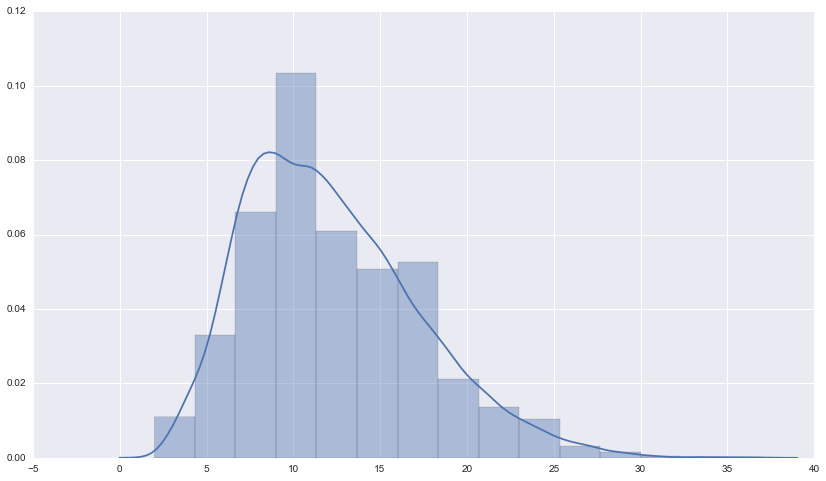

In [181]:
def hw_3_3_eda():
    # Items dictionary
    items = Counter()
    # Basket size variable
    basket = []
    # Iterate over records
    with open("ProductPurchaseData.txt", "r") as f:
        for line in f:
            # Split into individual items
            record = line.strip().split()
            # Add items to dictionary and to basket
            items += Counter(record)
            basket.append(len(record))
    # Print result and plot basket size distribution
    print ("The number of total items: {}.".format(sum(items.values())))
    print ("The number of unique items: {}.".format(len(items)))
    print ("The average size of the basket: {:.2f}.".format(np.mean(basket)))
    plt.figure(figsize=(14,8))
    sns.distplot(basket, bins=15)

hw_3_3_eda()

### 3.3 MapReduce
Strategy:  
- 1st stage:  
**Mapper**: purchase_record -> (item, 1, basketsize) (including (\*,count) for order inversion in relative frequency calculation)  
**Reducer**: (item, count) -> (item, total count, relative frequency, largest basketsize)  
  
- 2nd stage:  
Sort 1st stage output by total count.

In [196]:
!hdfs dfs -put ProductPurchaseData.txt /user/konniam/week_03/

16/01/29 23:59:04 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [42]:
%%writefile mapper_3_3.py
#!/usr/bin/env python
# Mapper for 3.3
# Author: Konniam Chan
# Shopping cart analysis
# Output goes to 1 reducer
import sys

# Count how many mappers called
sys.stderr.write("reporter:counter:MR-Counter,Num_mapper_calls,1\n")

for line in sys.stdin:
    record = line.strip().split()
    basketsize = len(record)
    # Assume 1 reducer in the next step
    # Emit count and basketsize, (*) stands for the total
    for item in record:
        print '%s\t%s\t%s' % ('*', 1, basketsize)
        print '%s\t%s\t%s' % (item, 1, basketsize)

Overwriting mapper_3_3.py


In [43]:
%%writefile combiner_3_3.py
#!/usr/bin/env python
## Combiner for 3.3
# Author: Konniam Chan
# Shopping cart analysis
import sys
current_item = None
current_count = 0
current_basketsize = 0
item = None

# Count how many combiners called
sys.stderr.write("reporter:counter:MR-Counter,Num_combiner_calls,1\n")

for line in sys.stdin:
    # Obtain item and intermediate counts
    line = line.strip()
    item, count, basketsize = line.split('\t')
    count = int(count)
    basketsize = int(basketsize)
    # Rely on sorting to increment item counts
    if current_item == item:
        current_count += count
        current_basketsize = max(current_basketsize, basketsize)
    else:
        if current_item:
            print '%s\t%s\t%s' % (current_item, current_count, current_basketsize)
        current_count = count
        current_item = item
        current_basketsize = basketsize

# Output last item
if current_item == item:
    print '%s\t%s\t%s' % (current_item, current_count, current_basketsize)

Overwriting combiner_3_3.py


In [45]:
%%writefile reducer_3_3.py
#!/usr/bin/env python
# Reducer for 3.3
# Author: Konniam Chan
# Shopping cart analysis
# Assume 1 reducer
from __future__ import division
import sys
current_item = None
current_count = 0
current_basketsize = 0
item = None

# Count how many reducers called
sys.stderr.write("reporter:counter:MR-Counter,Num_reducer_calls,1\n")

for line in sys.stdin:
    # Obtain item and intermediate counts
    line = line.strip()
    item, count, basketsize = line.split('\t')
    count = int(count)
    basketsize = int(basketsize)
    # Rely on sorting to increment item counts
    if current_item == item:
        current_count += count
        current_basketsize = max(current_basketsize, basketsize)
    else:
        # Obtain total count and save to memory
        if current_item == '*':
            total = current_count
        # Compute counts and relative frequencies for regular items
        elif current_item:
            # Output (item, count, relative frequency)
            print '%s\t%s\t%s\t%s' % (current_item, current_count, current_count / total, current_basketsize)
        current_count = count
        current_item = item
        current_basketsize = basketsize

# Output last item
if current_item == item:
    print '%s\t%s\t%s\t%s' % (current_item, current_count, current_count / total, current_basketsize)

Writing reducer_3_3.py


In [47]:
!chmod a+x *_3_3.py

In [48]:
# Shopping cart analysis, with counters for number of mappers, combiners, and reducers
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_3
# Use 4 mapper and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=4 \
-D mapreduce.job.reduces=1 \
-mapper $PWD/mapper_3_3.py \
-reducer $PWD/reducer_3_3.py \
-combiner $PWD/combiner_3_3.py \
-input /user/konniam/week_03/ProductPurchaseData.txt \
-output /user/konniam/week_03/hw_3_3

16/01/31 17:30:35 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/31 17:30:38 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_3
16/01/31 17:30:41 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar5571571146201173397/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob6445029810789433212.jar tmpDir=null
16/01/31 17:30:42 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/01/31 17:30:43 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/01/31 17:30:44 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/31 17:30:45 INFO mapreduce.JobSubmitter: number of splits:4
16/01/31 17:30:4

**Top 50 Purchased Items MR:**

In [4]:
%%writefile reducer_top50.py
#!/usr/bin/env python
# Reducer for 3.3
# Author: Konniam Chan
# Apriori Algorithm
import sys
N = 50
counter = 0
for line in sys.stdin:
    # Ouput N items only
    if counter >= N:
        continue
    print line.strip()
    counter += 1

Overwriting reducer_top50.py


In [3]:
!chmod a+x reducer_top50.py

In [5]:
# Sort results by count from 1st MR stage
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_3_sorted_count
# Use 4 mapper and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=4 \
-D mapreduce.job.reduces=1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapreduce.lib.partition.KeyFieldBasedComparator \
-D stream.num.map.output.key.fields=2 \
-D mapreduce.partition.keycomparator.options='-k2,2nr -k1,1' \
-mapper /bin/cat \
-reducer $PWD/reducer_top50.py \
-input /user/konniam/week_03/hw_3_3/part* \
-output /user/konniam/week_03/hw_3_3_sorted_count

16/02/03 11:23:52 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 11:23:53 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_3_sorted_count
16/02/03 11:23:54 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar2509895711049292365/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob8194126334403388460.jar tmpDir=null
16/02/03 11:23:56 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:23:57 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:23:58 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/03 11:23:58 INFO mapreduce.JobSubmitter: number of splits:4
16/

**Top 50 Purchased Items Results:**

Result format:  
**(Item, Count, Relative Frequency, Largest Basket in Which Item was Included)**

In [6]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_3_sorted_count/part-*

16/02/03 11:25:44 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI62779	6667	0.0175067747831	36
FRO40251	3881	0.010191059387	37
ELE17451	3875	0.0101753040775	37
GRO73461	3602	0.00945843749344	37
SNA80324	3044	0.00799319370628	36
ELE32164	2851	0.0074863979161	36
DAI75645	2736	0.00718442114993	37
SNA45677	2455	0.0064465474865	36
FRO31317	2330	0.0061183118711	37
DAI85309	2293	0.00602115412894	36
ELE26917	2292	0.00601852824402	33
FRO80039	2233	0.00586360103355	34
GRO21487	2115	0.00555374661261	37
SNA99873	2083	0.00546971829507	35
GRO59710	2004	0.00526227338613	37
GRO71621	1920	0.00504169905258	36
FRO85978	1918	0.00503644728273	37
GRO30386	1840	0.00483162825872	36
ELE74009	1816	0.00476860702057	35
GRO56726	1784	0.00468457870302	36
DAI63921	1773	0.00465569396887	35
GRO46854	1756	0.00461105392517	37
ELE66600	1713	0.00449814087347	37
DAI83733	1712	0.00449551498855	36
FRO32293	1702	0.00446925613932	36
ELE66810	

**Largest Basket MR**

In [7]:
%%writefile reducer_top1.py
#!/usr/bin/env python
# Reducer for 3.3
# Author: Konniam Chan
# Apriori Algorithm
import sys
N = 1
counter = 0
for line in sys.stdin:
    # Ouput N items only
    if counter >= N:
        continue
    print line.strip()
    counter += 1

Writing reducer_top1.py


In [8]:
!chmod a+x reducer_top1.py

In [9]:
# Sort results by basketsize from 1st MR stage
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_3_sorted_basket
# Use 4 mapper and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=4 \
-D mapreduce.job.reduces=1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapreduce.lib.partition.KeyFieldBasedComparator \
-D stream.num.map.output.key.fields=4 \
-D mapreduce.partition.keycomparator.options='-k4,4nr -k1,1' \
-mapper /bin/cat \
-reducer $PWD/reducer_top1.py \
-input /user/konniam/week_03/hw_3_3/part* \
-output /user/konniam/week_03/hw_3_3_sorted_basket

16/02/03 11:27:45 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 11:27:46 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_3_sorted_basket
16/02/03 11:27:48 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar6127660119398537226/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob2025001027078091936.jar tmpDir=null
16/02/03 11:27:49 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:27:50 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:27:51 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/03 11:27:51 INFO mapreduce.JobSubmitter: number of splits:4
16

**Largest Basket:** 37  
*Note: the largest basket of 37 occurred for many items, and not specific to the one item shown (it is simply the one that came out in alphabetical order)*

In [10]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_3_sorted_basket/part-*

16/02/03 11:28:42 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI35347	1060	0.00278343801861	37


**Number of Unique Items:** 12592

In [99]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_3/part-* | wc -l

16/01/30 16:51:00 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
   12592


### 3.3.1 OPTIONAL 
Using 2 reducers:  Report your findings such as number of unique products; largest basket; report the top 50 most frequently purchased items,  their frequency,  and their relative frequency (break ties by sorting the products alphabetical order) etc. using Hadoop Map-Reduce.

#### 3.3.1 Strategy
The key is to direct total counts from the first mapper to the 2 reducers using two \* keys ('\*0' and '\*1') for order inversion. The rest is same as above.

#### 3.31 Mapper

In [1]:
%%writefile mapper_3_3_1.py
#!/usr/bin/env python
# Mapper for 3.3.1
# Author: Konniam Chan
# Shopping cart analysis
# Output goes to 1 reducer
import sys

# Count how many mappers called
sys.stderr.write("reporter:counter:MR-Counter,Num_mapper_calls,1\n")

for line in sys.stdin:
    record = line.strip().split()
    basketsize = len(record)
    # Assume 2 reducers in the next step
    # Emit count and basketsize, (*) stands for the total
    for item in record:
        print '%s\t%s\t%s' % ('*0', 1, basketsize)
        print '%s\t%s\t%s' % ('*1', 1, basketsize)
        print '%s\t%s\t%s' % (item, 1, basketsize)

Writing mapper_3_3_1.py


#### 3.3.1 Combiner

Can use the combiner from 3.3

#### 3.3.1 Reducer

In [2]:
%%writefile reducer_3_3_1.py
#!/usr/bin/env python
# Reducer for 3.3.1
# Author: Konniam Chan
# Shopping cart analysis
# Assume 2 reducers
from __future__ import division
import sys
current_item = None
current_count = 0
current_basketsize = 0
item = None

# Count how many reducers called
sys.stderr.write("reporter:counter:MR-Counter,Num_reducer_calls,1\n")

for line in sys.stdin:
    # Obtain item and intermediate counts
    line = line.strip()
    item, count, basketsize = line.split('\t')
    count = int(count)
    basketsize = int(basketsize)
    # Rely on sorting to increment item counts
    if current_item == item:
        current_count += count
        current_basketsize = max(current_basketsize, basketsize)
    else:
        # Obtain total count and save to memory
        if current_item in ['*0', '*1']:
            total = current_count
        # Compute counts and relative frequencies for regular items
        elif current_item:
            # Output (item, count, relative frequency)
            print '%s\t%s\t%s\t%s' % (current_item, current_count, current_count / total, current_basketsize)
        current_count = count
        current_item = item
        current_basketsize = basketsize

# Output last item
if current_item == item:
    print '%s\t%s\t%s\t%s' % (current_item, current_count, current_count / total, current_basketsize)

Writing reducer_3_3_1.py


In [3]:
!chmod a+x *_3_3_1.py

#### 3.3.1 1st Stage MR

In [4]:
# Shopping cart analysis, with counters for number of mappers, combiners, and reducers
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_3_1
# Use 2 mappers and 2 reducers
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=2 \
-mapper $PWD/mapper_3_3_1.py \
-reducer $PWD/reducer_3_3_1.py \
-combiner $PWD/combiner_3_3.py \
-input /user/konniam/week_03/ProductPurchaseData.txt \
-output /user/konniam/week_03/hw_3_3_1

16/02/01 11:07:29 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
rm: `/user/konniam/week_03/hw_3_3_1': No such file or directory
16/02/01 11:07:32 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar2188033139595451417/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob1897984548306338732.jar tmpDir=null
16/02/01 11:07:33 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/01 11:07:33 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/01 11:07:35 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/01 11:07:35 INFO mapreduce.JobSubmitter: number of splits:2
16/02/01 11:07:35 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1454277284610_0021
16/02/01 11:07:35 INFO impl.Y

**3.3.1 Top 50 Purchased Items MR:**

In [1]:
# Sort results by count from 1st MR stage
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_3_1_sorted_count
# Use 2 mappers and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapreduce.lib.partition.KeyFieldBasedComparator \
-D stream.num.map.output.key.fields=2 \
-D mapreduce.partition.keycomparator.options='-k2,2nr -k1,1' \
-mapper /bin/cat \
-reducer $PWD/reducer_top50.py \
-input /user/konniam/week_03/hw_3_3_1/part* \
-output /user/konniam/week_03/hw_3_3_1_sorted_count

16/02/03 11:42:55 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 11:42:56 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_3_1_sorted_count
16/02/03 11:42:58 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar4222233125874937807/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob4453936316448288606.jar tmpDir=null
16/02/03 11:43:00 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:43:00 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:43:01 INFO mapred.FileInputFormat: Total input paths to process : 2
16/02/03 11:43:01 INFO mapreduce.JobSubmitter: number of splits:2
1

**3.3.1 Top 50 Purchased Items Results:**

Result format:  
**(Item, Count, Relative Frequency, Largest Basket in Which Item was Included)**

In [2]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_3_1_sorted_count/part-*

16/02/03 11:43:41 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI62779	6667	0.0175067747831	36
FRO40251	3881	0.010191059387	37
ELE17451	3875	0.0101753040775	37
GRO73461	3602	0.00945843749344	37
SNA80324	3044	0.00799319370628	36
ELE32164	2851	0.0074863979161	36
DAI75645	2736	0.00718442114993	37
SNA45677	2455	0.0064465474865	36
FRO31317	2330	0.0061183118711	37
DAI85309	2293	0.00602115412894	36
ELE26917	2292	0.00601852824402	33
FRO80039	2233	0.00586360103355	34
GRO21487	2115	0.00555374661261	37
SNA99873	2083	0.00546971829507	35
GRO59710	2004	0.00526227338613	37
GRO71621	1920	0.00504169905258	36
FRO85978	1918	0.00503644728273	37
GRO30386	1840	0.00483162825872	36
ELE74009	1816	0.00476860702057	35
GRO56726	1784	0.00468457870302	36
DAI63921	1773	0.00465569396887	35
GRO46854	1756	0.00461105392517	37
ELE66600	1713	0.00449814087347	37
DAI83733	1712	0.00449551498855	36
FRO32293	1702	0.00446925613932	36
ELE66810	

**3.3.1 Largest Basket MR**

In [3]:
# Sort results by basketsize from 1st MR stage
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_3_1_sorted_basket
# Use 2 mappers and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapreduce.lib.partition.KeyFieldBasedComparator \
-D stream.num.map.output.key.fields=4 \
-D mapreduce.partition.keycomparator.options='-k4,4nr -k1,1' \
-mapper /bin/cat \
-reducer $PWD/reducer_top1.py \
-input /user/konniam/week_03/hw_3_3_1/part* \
-output /user/konniam/week_03/hw_3_3_1_sorted_basket

16/02/03 11:43:56 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 11:43:57 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_3_1_sorted_basket
16/02/03 11:43:59 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar4460119617717925651/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob3572732194774922216.jar tmpDir=null
16/02/03 11:44:00 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:44:00 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:44:01 INFO mapred.FileInputFormat: Total input paths to process : 2
16/02/03 11:44:01 INFO mapreduce.JobSubmitter: number of splits:2


**3.3.1 Largest Basket:** 37  
*Note: the largest basket of 37 occurred for many items, and not specific to the one item shown (it is simply the one that came out in the item name sorting)*

In [4]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_3_1_sorted_basket/part-* | head -n 1

16/02/03 11:44:37 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI35347	1060	0.00278343801861	37


**3.3.1 Number of Unique Items:** 12592

In [9]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_3_1/part-* | wc -l

16/02/01 11:15:13 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
   12592


### HW3.4. (Computationally prohibitive but then again Hadoop can handle this) Pairs

Suppose we want to recommend new products to the customer based on the products they
have already browsed on the online website. Write a map-reduce program 
to find products which are frequently browsed together. Fix the support count (cooccurence count) to s = 100 
(i.e. product pairs need to occur together at least 100 times to be considered frequent) 
and find pairs of items (sometimes referred to itemsets of size 2 in association rule mining) that have a support count of 100 or more.  

List the top 50 product pairs with corresponding support count (aka frequency), and relative frequency or support (number of records where they coccur, the number of records where they coccur/the number of baskets in the dataset)  in decreasing order of support  for frequent (100>count) itemsets of size 2.  

Use the Pairs pattern (lecture 3)  to  extract these frequent itemsets of size 2. Free free to use combiners if they bring value. Instrument your code with counters for count the number of times your mapper, combiner and reducers are called.   
  
Please output records of the following form for the top 50 pairs (itemsets of size 2):  
  
      item1, item2, support count, support  
    


Fix the ordering of the pairs lexicographically (left to right), 
and break ties in support (between pairs, if any exist) 
by taking the first ones in lexicographically increasing order.   

Report  the compute time for the Pairs job. Describe the computational setup used (E.g., single computer; dual core; linux, number of mappers, number of reducers)
Instrument your mapper, combiner, and reducer to count how many times each is called using Counters and report these counts.  

**Strategy**  
- 1st stage:  
Mapper: basket -> (Item1, Item2, 1)  
Reducer: (Item1, Item2, 1) -> (Item1, Item2, count, relative frequency)  
*(Use 2 mappers and 2 reducers)*
  
- 2nd stage:
Sort (Item1, Item2, count, relative frequency) by count

#### Mapper 3.4

In [60]:
%%writefile mapper_3_4.py
#!/usr/bin/env python
# Mapper for 3.4
# Author: Konniam Chan
# Pairs analysis
import sys
from itertools import combinations

for line in sys.stdin:
    # Count how many mappers called
    sys.stderr.write("reporter:counter:MR-Counter,Num_mapper_calls,1\n")
    record = line.strip().split()
    # Assume all items in basket co-occur, get all combinations of items
    # Sort by alphanumerical order first and eliminate potential duplicates
    record = sorted(set(record))
    for combo in combinations(record, 2):
        # Emit each co-occurrence pair
        print '%s.%s\t%s' % (combo[0], combo[1], 1)
    # Assume 1 reducer in the next step
    # Emit total with key (*0 and *1) for order inversion (keep track of total number of baskets)
    # Assume output goes to 2 reducers
    print '%s\t%s' % ('*0' , 1)
    print '%s\t%s' % ('*1' , 1)

Overwriting mapper_3_4.py


#### Combiner 3.4

In [61]:
%%writefile combiner_3_4.py
#!/usr/bin/env python
## Combiner for 3.4
# Author: Konniam Chan
# Pairs analysis
import sys
current_pair = None
current_count = 0

for line in sys.stdin:
    # Count how many combiners called
    sys.stderr.write("reporter:counter:MR-Counter,Num_combiner_calls,1\n")
    # Obtain pair and intermediate counts
    line = line.strip()
    pair, count = line.split('\t')
    count = int(count)
    # Rely on sorting to increment pair counts
    if current_pair == pair:
        current_count += count
    else:
        if current_pair:
            print '%s\t%s' % (current_pair, current_count)
        current_count = count
        current_pair = pair

# Output last pair
if current_pair == pair:
    print '%s\t%s' % (current_pair, current_count)

Overwriting combiner_3_4.py


#### Reducer 3.4

In [62]:
%%writefile reducer_3_4.py
#!/usr/bin/env python
## Reducer for 3.4
# Author: Konniam Chan
# Pairs analysis
from __future__ import division
import sys
current_pair = None
current_count = 0
s = 100

for line in sys.stdin:
    # Count how many reducers called
    sys.stderr.write("reporter:counter:MR-Counter,Num_reducer_calls,1\n")
    # Obtain pair and intermediate counts
    line = line.strip()
    pair, count = line.split('\t')
    count = int(count)
    # Rely on sorting to increment pair counts
    if current_pair == pair:
        current_count += count
    else:
        # Obtain total count and save to memory
        if current_pair in ['*0', '*1']:
            total = current_count 
        elif current_pair:
            # Emit only if count is above s (100)
            if current_count >= s:
                item_1, item_2 = current_pair.split('.')
                print '%s\t%s\t%s\t%s' % (item_1, item_2, current_count, current_count / total)
        current_count = count
        current_pair = pair        

# Output last pair
if current_pair == pair:
    # Emit only if count is above s (100)
    if current_count >= s:
        item_1, item_2 = current_pair.split('.')
        print '%s\t%s\t%s\t%s' % (item_1, item_2, current_count, current_count / total)

Overwriting reducer_3_4.py


In [63]:
!chmod a+x *_3_4.py

#### 3.4 MR 1st Stage

In [64]:
# Shopping cart analysis with pairs, with counters for number of mappers, combiners, and reducers
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_4
# Use 2 mappers and 2 reducers
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=2 \
-mapper $PWD/mapper_3_4.py \
-combiner $PWD/combiner_3_4.py \
-reducer $PWD/reducer_3_4.py \
-input /user/konniam/week_03/ProductPurchaseData.txt \
-output /user/konniam/week_03/hw_3_4

16/01/31 18:05:56 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/31 18:05:57 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_4
16/01/31 18:05:59 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar709333870281094859/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob7289565244085294957.jar tmpDir=null
16/01/31 18:06:00 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/01/31 18:06:01 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/01/31 18:06:02 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/31 18:06:02 INFO mapreduce.JobSubmitter: number of splits:2
16/01/31 18:06:02

In [65]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_4/part* | wc -l

16/01/31 18:07:15 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
    1334


#### 3.4 MR 2nd Stage (sort by count)

In [5]:
# Shopping cart analysis with pairs, with counters for number of mappers, combiners, and reducers
# Sort output of 1st stage MR to get top support counts
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_4_sorted
# Use 2 mappers and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapreduce.lib.partition.KeyFieldBasedComparator \
-D stream.num.map.output.key.fields=3 \
-D mapreduce.partition.keycomparator.options='-k3,3nr -k1,2' \
-mapper /bin/cat \
-reducer $PWD/reducer_top50.py \
-input /user/konniam/week_03/hw_3_4/part* \
-output /user/konniam/week_03/hw_3_4_sorted

16/02/03 11:45:23 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 11:45:24 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_4_sorted
16/02/03 11:45:25 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar3029703903248871676/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob984625331549406897.jar tmpDir=null
16/02/03 11:45:27 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:45:27 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:45:28 INFO mapred.FileInputFormat: Total input paths to process : 2
16/02/03 11:45:29 INFO mapreduce.JobSubmitter: number of splits:2
16/02/03 1

### 3.4 Results
#### Top 50 product pairs by support counts

In [6]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_4_sorted/part*

16/02/03 11:46:03 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI62779	ELE17451	1592	0.0511880646925
FRO40251	SNA80324	1412	0.0454004694383
DAI75645	FRO40251	1254	0.0403202469374
FRO40251	GRO85051	1213	0.0390019613517
DAI62779	GRO73461	1139	0.0366226166361
DAI75645	SNA80324	1130	0.0363332368734
DAI62779	FRO40251	1070	0.0344040384554
DAI62779	SNA80324	923	0.0296775023311
DAI62779	DAI85309	918	0.0295167357963
ELE32164	GRO59710	911	0.0292916626475
DAI62779	DAI75645	882	0.0283592167454
FRO40251	GRO73461	882	0.0283592167454
DAI62779	ELE92920	877	0.0281984502106
FRO40251	FRO92469	835	0.026848011318
DAI62779	ELE32164	832	0.0267515513971
DAI75645	GRO73461	712	0.0228931545609
DAI43223	ELE32164	711	0.022861001254
DAI62779	GRO30386	709	0.02279669464
ELE17451	FRO40251	697	0.0224108549564
DAI85309	ELE99737	659	0.0211890292917
DAI62779	ELE26917	650	0.020899649529
GRO21487	GRO73461	631	0.0202887366966
DAI62779	SNA45

### 3.4 Pairs Statistics

| Property                                                                   | Configuration    |
|----------------------------------------------------------------------------|------------------|
| Operating System                                                           | Mac              |
| Cores                                                                      | 2                |
| Memory                                                                     | 4GB              |
| Number of Tuples Processed                                                 |                  |
| - Mappers                                                                  | 31,101           |
| - Combiners                                                                | 2,596,216        |
| - Reducers                                                                 | 1,026,711        |

| Stage                                                                      | Elapsed Time (s) |
|----------------------------------------------------------------------------|------------------|
| 1st Stage MapReduce (2 mappers, 2 reducers, with combiners)                | 56               |
| 2nd Stage MapReduce (2 mappers, 1 reducer)                                 | 19               |
| Total                                                                      | 75               |

### HW3.5: Stripes
Repeat 3.4 using the stripes design pattern for finding cooccuring pairs.  
  
Report  the compute times for stripes job versus the Pairs job. Describe the computational setup used (E.g., single computer; dual core; linux, number of mappers, number of reducers)  

Instrument your mapper, combiner, and reducer to count how many times each is called using Counters and report these counts. Discuss the differences in these counts between the Pairs and Stripes jobs

**Strategy**  
- 1st stage:  
Mapper: basket -> (Item_i, Stripe_i) [where Stripe_i is a json formatted string]  
Reducer: (Item_i, Stripe_i) -> (Item1, Item2, count, relative frequency)  
*(Use 2 mappers and 2 reducers)*
  
- 2nd stage:
Sort (Item1, Item2, count, relative frequency) by count

#### 3.5 Mapper

In [8]:
%%writefile mapper_3_5.py
#!/usr/bin/env python
# Mapper for 3.5
# Author: Konniam Chan
# Stripes shopping cart analysis
import sys
import json
from itertools import combinations

for line in sys.stdin:
    # Count how many mappers called
    sys.stderr.write("reporter:counter:MR-Counter,Num_mapper_calls,1\n")
    # Read record
    record = line.strip().split()
    # Assume all items in basket co-occur, get all combinations of items
    # Sort by alphanumerical order first and eliminate potential duplicates
    record = sorted(set(record))
    # Skip last item because it will always be part of another item's row
    stripes = {item:{} for item in record[:-1]}
    # Create stripes
    for pair in combinations(record, 2):
        stripes[pair[0]][pair[1]] = 1
    # Emit each stripe
    for k,v in stripes.items():
        print '%s\t%s' % (k, json.dumps(v))
    # Emit basket count for order inversion
    # Assume 2 reducers
    print '%s\t%s' % ('*0', json.dumps({"*0": 1}))
    print '%s\t%s' % ('*1', json.dumps({"*1": 1}))

Overwriting mapper_3_5.py


#### 3.5 Combiner

In [7]:
%%writefile combiner_3_5.py
#!/usr/bin/env python
# Combiner for 3.5
# Author: Konniam Chan
# Stripes shopping cart analysis
import sys
import json

current_item = None
current_stripe = {}

# Function to add stripes
def add_stripes(current_stripe, stripe):
    for key in stripe:
        if key in current_stripe:
            current_stripe[key] += stripe[key]
        else:
            current_stripe[key] = stripe[key]
    return current_stripe

for line in sys.stdin:
    # Count how many combiners called
    sys.stderr.write("reporter:counter:MR-Counter,Num_combiner_calls,1\n")
    # Obtain stripe
    line = line.strip()
    item, stripe = line.split('\t')
    # Read json string, then convert to Counter dictionary
    stripe = json.loads(stripe)
    # Rely on sorting to collect stripes
    if current_item == item:
        current_stripe = add_stripes(current_stripe, stripe)
    else:    
        if current_item:        
            print '%s\t%s' % (current_item, json.dumps(current_stripe))
        current_stripe = stripe
        current_item = item

# Output last stripe
if current_item == item:
    print '%s\t%s' % (current_item, json.dumps(current_stripe))

Overwriting combiner_3_5.py


#### 3.5 Reducer

In [19]:
%%writefile reducer_3_5.py
#!/usr/bin/env python
## Reducer for 3.5
# Author: Konniam Chan
# Stripes shopping cart analysis
from __future__ import division
import sys
import json

current_item = None
current_stripe = {}
s = 100

# Function to add stripes
def add_stripes(current_stripe, stripe):
    for key in stripe:
        if key in current_stripe:
            current_stripe[key] += stripe[key]
        else:
            current_stripe[key] = stripe[key]
    return current_stripe

for line in sys.stdin:
    # Count how many reducers called
    sys.stderr.write("reporter:counter:MR-Counter,Num_reducer_calls,1\n")
    # Obtain stripe
    line = line.strip()
    item, stripe = line.split('\t')
    # Read json string, then convert to Counter dictionary
    stripe = json.loads(stripe)
    # Rely on sorting to collect stripes
    if current_item == item:
        current_stripe = add_stripes(current_stripe, stripe)
    else:
        # Obtain total count and save to memory
        if current_item == '*0':
            total = current_stripe['*0']
        elif current_item == '*1':
            total = current_stripe['*1']
        elif current_item:
            # Output all neighbor pairs in the stripe
            for neighbor, current_count in current_stripe.items():
                # Output in support is at least 100
                if current_count >= s:
                    print '%s\t%s\t%s\t%s' % (current_item, neighbor, current_count, current_count/total)
        current_stripe = stripe
        current_item = item

# Output last stripe
if current_item == item:
    for neighbor, current_count in current_stripe.items():
        if current_count >= s:
            print '%s\t%s\t%s\t%s' % (current_item, neighbor, current_count, current_count/total)

Overwriting reducer_3_5.py


In [79]:
!chmod a+x *_3_5.py

#### 3.5 MR 1st Stage

In [20]:
# Shopping cart analysis with stripes, with counters for number of mappers, combiners, and reducers
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_5
# Use 2 mappers and 2 reducers
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=2 \
-mapper $PWD/mapper_3_5.py \
-reducer $PWD/reducer_3_5.py \
-combiner $PWD/combiner_3_5.py \
-input /user/konniam/week_03/ProductPurchaseData.txt \
-output /user/konniam/week_03/hw_3_5

16/02/03 11:58:50 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 11:58:51 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_5
16/02/03 11:58:52 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar5986202487866547422/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob1043533591408109191.jar tmpDir=null
16/02/03 11:58:54 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:58:54 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 11:58:55 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/03 11:58:55 INFO mapreduce.JobSubmitter: number of splits:2
16/02/03 11:58:5

In [21]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_5/part* | wc -l

16/02/03 12:05:17 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
    1334


#### 3.5 MR 2nd Stage (sort by count)

In [22]:
# Shopping cart analysis with pairs, with counters for number of mappers, combiners, and reducers
# Sort output of 1st stage MR to get top support counts
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_5_sorted
# Use 2 mappers and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=1 \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapreduce.lib.partition.KeyFieldBasedComparator \
-D stream.num.map.output.key.fields=3 \
-D mapreduce.partition.keycomparator.options='-k3,3nr -k1,2' \
-mapper /bin/cat \
-reducer $PWD/reducer_top50.py \
-input /user/konniam/week_03/hw_3_5/part* \
-output /user/konniam/week_03/hw_3_5_sorted

16/02/03 12:05:42 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 12:05:43 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_5_sorted
16/02/03 12:05:45 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar784545658839887956/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob7683328440605710148.jar tmpDir=null
16/02/03 12:05:47 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 12:05:47 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 12:05:48 INFO mapred.FileInputFormat: Total input paths to process : 2
16/02/03 12:05:48 INFO mapreduce.JobSubmitter: number of splits:3
16/02/03 1

### 3.5 Results
#### Top 50 product pairs by support counts

In [23]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_5_sorted/part*

16/02/03 12:06:30 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI62779	ELE17451	1592	0.0511880646925
FRO40251	SNA80324	1412	0.0454004694383
DAI75645	FRO40251	1254	0.0403202469374
FRO40251	GRO85051	1213	0.0390019613517
DAI62779	GRO73461	1139	0.0366226166361
DAI75645	SNA80324	1130	0.0363332368734
DAI62779	FRO40251	1070	0.0344040384554
DAI62779	SNA80324	923	0.0296775023311
DAI62779	DAI85309	918	0.0295167357963
ELE32164	GRO59710	911	0.0292916626475
DAI62779	DAI75645	882	0.0283592167454
FRO40251	GRO73461	882	0.0283592167454
DAI62779	ELE92920	877	0.0281984502106
FRO40251	FRO92469	835	0.026848011318
DAI62779	ELE32164	832	0.0267515513971
DAI75645	GRO73461	712	0.0228931545609
DAI43223	ELE32164	711	0.022861001254
DAI62779	GRO30386	709	0.02279669464
ELE17451	FRO40251	697	0.0224108549564
DAI85309	ELE99737	659	0.0211890292917
DAI62779	ELE26917	650	0.020899649529
GRO21487	GRO73461	631	0.0202887366966
DAI62779	SNA45

### 3.5 Stripes Statistics

| Property                                                                   | Configuration    |
|----------------------------------------------------------------------------|------------------|
| Operating System                                                           | Mac              |
| Cores                                                                      | 2                |
| Memory                                                                     | 4GB              |
| Number of Tuples Processed                                                 |                  |
| - Mappers                                                                  | 31,101           |
| - Combiners                                                                | 411,922          |
| - Reducers                                                                 | 16,944           |

| Stage                                                                      | Elapsed Time (s) |
|----------------------------------------------------------------------------|------------------|
| 1st Stage MapReduce (2 mappers, 2 reducers, with combiners)                | 41               |
| 2nd Stage MapReduce (2 mappers, 1 reducer)                                 | 22               |
| Total                                                                      | 63               |

### 3.5 Response

In the pairs formulation, there are many records transmitted between the mappers and the reducers. In this particular problem, the reducer received over 1,000,000 records. In the stripes formulation, due to the more condensed structure of the stripe, there are only about 17,000 records. In jobs where there are a large number of mappers and reducers on different networks, the number of tuples sent in the pairs approach could be prohibitive. In our pseudo-distributed environment, both mappers and reducers live on the same network and we didn't incur any network costs. The stripes approach is faster by 12 seconds. If the network costs were more significant, we would see stripes performing significantly better.

### HW3.6
What is the Apriori algorithm? Describe an example use in your domain of expertise and what kind of . Define confidence and lift.

#### Apriori
The Apriori algorithm is used to find frequent item sets. These sets are useful in generating assocation rules, which are widely used in recommendations. The central idea is that if a set of items A is frequent, so is any subset of A. Thus, if any subset of A is not frequent, then A cannot be frequent. This idea is used to limit the large space of higher-number item sets.  
  
The algorithm works in stages. In the first pass, we look at all baskets of transactions and generates a list of counts for each item (C1). We filter it based on a specified minimmum support count and obtain a set of frequent items of size 1 (L1). In the second pass, we look at all baskets, filtered out all items NOT in L1, then use the rest to generate candidate paris (C2). We filter this list to generate frequent items of size 2 (L2). In the third pass, we look at all baskets and filtered out all items not in L1. We form pairs, then filter out items not in L2. We then form triplet candidates (C3), filter to get L3. Repeat until we get to the size of frequent items that we want.  
#### Confidence and Lift
For an association rule A -> b, **confidence** measures how "likely" b would occur, in the baskets that contain A. High confidence means that if A is in the basket, b is likley to be in the same basket. The formula is: $\frac{support(A\ U\ b)}{support(A)}$.
  
**Lift** measures the ratio between confidence and how likley is b to occur unconditionally. It can be calculated as $\frac{Confidence(A->b)}{Confidence(null->b)}$ where $Confidence(null -> b) = support(b)$

#### Applications
One could use Apriori algorithm to create marketing campaigns in retail stores, let's say at Starbucks. If an association rule shows that two food items are often purchased together, we can advertise both items in some fashion to increase revenue per transaction. 

### HW3.7. Shopping Cart Analysis
Product Recommendations: The action or practice of selling additional products or services 
to existing customers is called cross-selling. Giving product recommendation is 
one of the examples of cross-selling that are frequently used by online retailers. 
One simple method to give product recommendations is to recommend products that are frequently
browsed together by the customers.  
  
Suppose we want to recommend new products to the customer based on the products they
have already browsed on the online website. Write a program using the A-priori algorithm
to find products which are frequently browsed together. Fix the support to s = 100 
(i.e. product sets need to occur together at least 100 times to be considered frequent) 
and find itemsets of size 2 and 3.  
  
Then extract association rules from these frequent items.   
  
A rule is of the form:   
  
(item1, item5) ⇒ item2.  
  
List the top 10 discovered rules in descreasing order of confidence in the following format  
   
(item1, item5) ⇒ item2, supportCount ,support, confidence

### Strategy
We will do 3 passes over the data, to get the set of triples with support of at least 100 (L3). Then we can easily do another MR job to calculate confidence by dividing L3 counts with the corresponding L2 counts. Thus, in total we will run 4 MR jobs.

### 1st pass of Apriori Algorithm

In [2]:
%%writefile mapper_3_7_pass1.py
#!/usr/bin/env python
# Mapper for 3.7
# Author: Konniam Chan
# Apriori Algorithm
import sys

for line in sys.stdin:
    record = line.strip().split()
    # Emit count of item
    for item in record:
        print '%s\t%s' % (item, 1)

Writing mapper_3_7_pass1.py


In [25]:
%%writefile combiner_3_7_pass1.py
#!/usr/bin/env python
## Combiner for 3.7
# Author: Konniam Chan
# Apriori
import sys
current_item = None
current_count = 0
item = None

for line in sys.stdin:
    # Obtain item and intermediate counts
    line = line.strip()
    item, count = line.split('\t')
    count = int(count)
    # Rely on sorting to increment item counts
    if current_item == item:
        current_count += count
    else:
        if current_item:
            print '%s\t%s' % (current_item, current_count)
        current_count = count
        current_item = item

# Output last item
if current_item == item:
    print '%s\t%s' % (current_item, current_count)

Writing combiner_3_7_pass1.py


In [4]:
%%writefile reducer_3_7_pass1.py
#!/usr/bin/env python
## Reducer for 3.7
# Author: Konniam Chan
# Apriori
import sys
current_item = None
current_count = 0
item = None
SUPPORT = 100

for line in sys.stdin:
    # Obtain item and intermediate counts
    line = line.strip()
    item, count = line.split('\t')
    count = int(count)
    # Rely on sorting to increment item counts
    if current_item == item:
        current_count += count
    else:
        if current_item and current_count >= SUPPORT:
            print '%s\t%s' % (current_item, current_count)
        current_count = count
        current_item = item

# Output last item
if current_item == item and current_count >= SUPPORT:
    print '%s\t%s' % (current_item, current_count)

Writing reducer_3_7_pass1.py


In [5]:
!chmod a+x *_3_7_pass1.py

#### Obtain L1

In [6]:
# Apriori
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_7_pass1
# Use 2 mappers and 2 reducers
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=1 \
-mapper $PWD/mapper_3_7_pass1.py \
-combiner $PWD/combiner_3_7_pass1.py \
-reducer $PWD/reducer_3_7_pass1.py \
-input /user/konniam/week_03/ProductPurchaseData.txt \
-output /user/konniam/week_03/hw_3_7_pass1

16/02/03 23:28:15 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 23:28:16 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_7_pass1
16/02/03 23:28:18 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar4403250698977015195/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob7955926000752034618.jar tmpDir=null
16/02/03 23:28:20 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 23:28:21 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 23:28:23 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/03 23:28:23 INFO mapreduce.JobSubmitter: number of splits:2
16/02/03 2

In [7]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_7_pass1/part* | wc -l

16/02/03 23:30:17 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
     647


In [8]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_7_pass1/part* | sort -k2,2nr | head

16/02/03 23:30:20 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI62779	6667
FRO40251	3881
ELE17451	3875
GRO73461	3602
SNA80324	3044
ELE32164	2851
DAI75645	2736
SNA45677	2455
FRO31317	2330
DAI85309	2293


In [9]:
!hdfs dfs -getmerge /user/konniam/week_03/hw_3_7_pass1 L1_counts.txt

16/02/03 23:30:24 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### 2nd Pass to Obtain L2

In [10]:
%%writefile mapper_3_7_pass2.py
#!/usr/bin/env python
# Mapper for 3.7
# Author: Konniam Chan
# Apriori Algorithm
import sys
from itertools import combinations

# Array to hold frequent items
freq_items_L1 = []
with open("L1_counts.txt", "r") as f:
    for line in f:
        item, _ = line.strip().split()
        freq_items_L1.append(item)

# Accept input from Hadoop streaming
for line in sys.stdin:
    items = line.strip().split()
    # Filter to only include items in frequent list
    items = filter(lambda x: x in freq_items_L1, items)
    # Sort items
    items = sorted(set(items))
    # Create candidate pairs (C2)
    for pair in combinations(items, 2):                                
        print '%s.%s\t%s' % (pair[0], pair[1], 1)

Writing mapper_3_7_pass2.py


In [11]:
!cp combiner_3_7_pass1.py combiner_3_7_pass2.py
!cp reducer_3_7_pass1.py reducer_3_7_pass2.py

In [12]:
!chmod a+x *_3_7_pass2.py

### Obtain L2

In [13]:
# Apriori
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_7_pass2
# Use 2 mappers and 2 reducers
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=2 \
-mapper $PWD/mapper_3_7_pass2.py \
-combiner $PWD/combiner_3_7_pass2.py \
-reducer $PWD/reducer_3_7_pass2.py \
-input /user/konniam/week_03/ProductPurchaseData.txt \
-output /user/konniam/week_03/hw_3_7_pass2 \
-file L1_counts.txt

16/02/03 23:30:58 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 23:30:59 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_7_pass2
16/02/03 23:31:01 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
16/02/03 23:31:01 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [L1_counts.txt, /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar721548109007871352/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob6445342460718776132.jar tmpDir=null
16/02/03 23:31:03 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 23:31:03 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 23:31:05 INFO mapre

In [14]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_7_pass2/part* | wc -l

16/02/03 23:32:08 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
    1334


In [15]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_7_pass2/part* | sort -k2,2nr | head

16/02/03 23:32:12 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI62779.ELE17451	1592
FRO40251.SNA80324	1412
DAI75645.FRO40251	1254
FRO40251.GRO85051	1213
DAI62779.GRO73461	1139
DAI75645.SNA80324	1130
DAI62779.FRO40251	1070
DAI62779.SNA80324	923
DAI62779.DAI85309	918
ELE32164.GRO59710	911


In [16]:
!hdfs dfs -getmerge /user/konniam/week_03/hw_3_7_pass2 L2_counts.txt

16/02/03 23:32:16 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Third pass to obtain L3

In [29]:
%%writefile mapper_3_7_pass3.py
#!/usr/bin/env python
# Mapper for 3.7
# Author: Konniam Chan
# Apriori Algorithm
import sys
from itertools import combinations

# Arrays to hold frequent items
freq_items_L1 = []
with open("L1_counts.txt", "r") as f:
    for line in f:
        item, _ = line.strip().split()
        freq_items_L1.append(item)
        
freq_items_L2 = []
with open("L2_counts.txt", "r") as f:
    for line in f:
        item, _ = line.strip().split()
        freq_items_L2.append(item)
# Function to yield a pair for evalution
def generate_pairs(items):
    '''
    Input: list of items filtered by L1
    Output: pairs of items, filtered by L2
    '''
    for pair in combinations(items, 2):
        if '.'.join([pair[0], pair[1]]) in freq_items_L2:
            yield pair

# Accept input from Hadoop streaming
for line in sys.stdin:
    items = line.strip().split()
    # Filter using L1 and sort
    items = filter(lambda x: x in freq_items_L1, items)
    items = sorted(set(items))
    # Form C3 from filtered L2 pairs
    for pair in generate_pairs(items):
        first, second = pair[0], pair[1]
        second_index = items.index(second)
        # Only look at items after the pair to find match (avoid double counting)
        for third in items[second_index+1:]:
            # Check if triple is a viable candidate
            if '.'.join([second, third]) in freq_items_L2 and '.'.join([first, third]) in freq_items_L2:                        
                # Triple is possible
                print '%s.%s.%s\t%s' % (first, second, third, 1)
    # Emit total for order inversion
    print '%s\t%s' % ('*0', 1)
    print '%s\t%s' % ('*1', 1)

Overwriting mapper_3_7_pass3.py


In [26]:
# Use same combiner as pass 1
!mv combiner_3_7_pass1.py combiner_3_7_pass3.py

In [37]:
%%writefile reducer_3_7_pass3.py
#!/usr/bin/env python
## Reducer for 3.7
# Author: Konniam Chan
# Apriori
from __future__ import division
import sys
current_triple = None
current_count = 0
triple = None
SUPPORT = 100

for line in sys.stdin:
    # Obtain triple and intermediate counts
    line = line.strip()
    triple, count = line.split('\t')
    count = int(count)
    # Rely on sorting to increment triple counts
    if current_triple == triple:
        current_count += count
    else:
        if current_triple in ['*0', '*1']:
            total = current_count        
        elif current_triple:
            if current_count >= SUPPORT:
                print '%s\t%s\t%s' % (current_triple, current_count, current_count / total)
        current_count = count
        current_triple = triple

# Output last triple
if current_triple == triple and current_count >= SUPPORT:
    print '%s\t%s\t%s' % (current_triple, current_count, current_count / total)

Overwriting reducer_3_7_pass3.py


In [33]:
!chmod a+x *_3_7_pass3.py

#### Obtain L3

In [39]:
# Apriori
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_7_pass3
# Use 2 mappers and 2 reducers
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=2 \
-mapper $PWD/mapper_3_7_pass3.py \
-combiner $PWD/combiner_3_7_pass3.py \
-reducer $PWD/reducer_3_7_pass3.py \
-input /user/konniam/week_03/ProductPurchaseData.txt \
-output /user/konniam/week_03/hw_3_7_pass3 \
-file L1_counts.txt \
-file L2_counts.txt

16/02/03 23:58:38 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/03 23:58:39 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_7_pass3
16/02/03 23:58:41 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
16/02/03 23:58:41 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [L1_counts.txt, L2_counts.txt, /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar2932304002032762554/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob3434050542611831197.jar tmpDir=null
16/02/03 23:58:43 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 23:58:43 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/03 23:

In [40]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_7_pass3/part* | sort -k2,2nr | head

16/02/04 00:00:20 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DAI75645.FRO40251.SNA80324	550	0.0176843188322
DAI62779.FRO40251.SNA80324	476	0.0153049741166
FRO40251.GRO85051.SNA80324	471	0.0151442075817
DAI62779.ELE92920.SNA18336	432	0.01389022861
DAI62779.DAI75645.SNA80324	421	0.0135365422334
DAI62779.ELE17451.SNA80324	417	0.0134079290055
DAI62779.DAI75645.FRO40251	412	0.0132471624707
DAI62779.ELE17451.FRO40251	406	0.0130542426289
DAI75645.FRO40251.GRO85051	395	0.0127005562522
DAI62779.FRO40251.GRO85051	381	0.0122504099547


### 4th MR job to obtain confidence

In [45]:
%%writefile mapper_3_7_pass4.py
#!/usr/bin/env python
# Mapper for 3.7
# Author: Konniam Chan
# Apriori Algorithm
from __future__ import division
from itertools import combinations
import sys

# Load L2 dictionary
L2_counts = {}
with open("L2_counts.txt", "r") as f:
    for line in f:
        pair, L2_support_count = line.strip().split()
        L2_counts[pair] = int(L2_support_count)

for line in sys.stdin:    
    triple, L3_support_count, L3_support = line.strip().split()
    items = triple.split('.')
    # Obtain confidence
    for pair in combinations(items, 2):
        item_1, item_2 = pair[0], pair[1]
        item_3 = [x for x in items if x != item_1 and x != item_2][0]
        L2_support_count = L2_counts['.'.join([item_1, item_2])]
        confidence = int(L3_support_count) / L2_support_count
        
        print ('%s.%s\t-> %s, %s,\t%s,\t%s' %
               (item_1, item_2, item_3, L3_support_count, L3_support, confidence))

Overwriting mapper_3_7_pass4.py


In [46]:
%%writefile reducer_3_7_pass4.py
#!/usr/bin/env python
# Mapper for 3.7
# Author: Konniam Chan
# Apriori Algorithm
import sys

counter = 0
N = 10
for line in sys.stdin:
    # Output 10 lines only
    if counter >= N:
        continue
    print line.strip()
    counter += 1

Overwriting reducer_3_7_pass4.py


In [43]:
!chmod a+x *_3_7_pass4.py

In [49]:
# Apriori
!hdfs dfs -rm -r /user/konniam/week_03/hw_3_7_pass4
# Use 2 mappers and 1 reducer
!hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapreduce.lib.partition.KeyFieldBasedComparator \
-D stream.num.map.output.key.fields=4 \
-D mapreduce.partition.keycomparator.options="-k4,4nr -k3,3nr" \
-D mapreduce.job.maps=2 \
-D mapreduce.job.reduces=1 \
-mapper $PWD/mapper_3_7_pass4.py \
-reducer $PWD/reducer_3_7_pass4.py \
-input /user/konniam/week_03/hw_3_7_pass3/part* \
-output /user/konniam/week_03/hw_3_7_pass4 \
-file L2_counts.txt

16/02/04 00:06:34 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/02/04 00:06:35 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/konniam/week_03/hw_3_7_pass4
16/02/04 00:06:36 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
16/02/04 00:06:36 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [L2_counts.txt, /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/hadoop-unjar3104935187276488070/] [] /var/folders/l8/h51_59852qscq403fs6q0xlh0000gn/T/streamjob102885312347332334.jar tmpDir=null
16/02/04 00:06:37 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/04 00:06:38 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
16/02/04 00:06:39 INFO mapre

### Top 10 Rules by Confidence
(sorted by support if tied)

**Results Formuat**  
(item1, item2) -> item3, supportCount, support, confidence

In [50]:
!hdfs dfs -cat /user/konniam/week_03/hw_3_7_pass4/part*

16/02/04 00:07:17 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
GRO85051.SNA80324	-> FRO40251, 471,	0.0151442075817,	1.0
DAI75645.GRO85051	-> FRO40251, 395,	0.0127005562522,	1.0
ELE17451.GRO85051	-> FRO40251, 217,	0.00697726761197,	1.0
GRO73461.GRO85051	-> FRO40251, 147,	0.00472653612424,	1.0
ELE26917.GRO85051	-> FRO40251, 146,	0.00469438281727,	1.0
DAI23334.ELE92920	-> DAI62779, 143,	0.00459792289637,	1.0
ELE20847.GRO85051	-> FRO40251, 139,	0.0044693096685,	1.0
DAI55911.GRO85051	-> FRO40251, 133,	0.00427638982669,	1.0
ELE20847.FRO92469	-> FRO40251, 122,	0.00392270345005,	1.0
GRO21487.GRO85051	-> FRO40251, 120,	0.00385839683611,	1.0


### HW3.8
Benchmark your results using the pyFIM implementation of the Apriori algorithm
(Apriori - Association Rule Induction / Frequent Item Set Mining implemented by Christian Borgelt). 
You can download pyFIM from here:  
  
http://www.borgelt.net/pyfim.html  
  
Comment on the results from both implementations (your Hadoop MapReduce of apriori versus pyFIM) 
in terms of results and execution times.  

In [51]:
from fim import apriori

In [57]:
def apriori_3_8():
    # Pre-process to create iterable
    transactions = []
    with open('ProductPurchaseData.txt', 'r') as f:
        for line in f:
            items = line.strip().split()
            transactions.append(items)
    # Apriori    
    results = apriori(transactions, target='r', supp=-100, zmin=3, zmax=3, report='asc')
    # Sort by confidence, then by support
    results = sorted(results, key=lambda x: (-x[4], -x[3]))
    for row in results[:10]:
        print row[1], row[0], row[2], row[3], row[4]

apriori_3_8()

('GRO85051', 'SNA80324') FRO40251 471 0.0151442075817 1.0
('GRO85051', 'DAI75645') FRO40251 395 0.0127005562522 1.0
('GRO85051', 'ELE17451') FRO40251 217 0.00697726761197 1.0
('GRO85051', 'GRO73461') FRO40251 147 0.00472653612424 1.0
('GRO85051', 'ELE26917') FRO40251 146 0.00469438281727 1.0
('DAI23334', 'ELE92920') DAI62779 143 0.00459792289637 1.0
('ELE20847', 'GRO85051') FRO40251 139 0.0044693096685 1.0
('DAI55911', 'GRO85051') FRO40251 133 0.00427638982669 1.0
('ELE20847', 'FRO92469') FRO40251 122 0.00392270345005 1.0
('GRO85051', 'GRO21487') FRO40251 120 0.00385839683611 1.0


The results of Mapreduce and pyFIM implementatioans are identical. In terms of execution times, pyFIM took less than 1 second, while MR took about 3 mins in total. Because the data set is small in this case and could be held in memory effectively, the in-memory approach of pyFIM is much faster. However, if the data set wee 1TB, Mapreduce could still handle it with multiple machines, where as pyFIM will fail to work.